In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



Lectura de los datos

In [71]:
df = pd.read_csv('netflix_titles.csv')

Inspeccion inicial de los datos

In [72]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Ver cantidad de filas y columnas

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Ver los nombres de las columnas

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Manejo de los valores Faltantes

In [8]:
missing_values = df.isnull().sum()
missing_values_df = pd.DataFrame({'missing_values': missing_values})
final = missing_values_df.sort_values(by='missing_values', ascending=False).reset_index().rename(columns={'index': 'column_name'})
print(final)

     column_name  missing_values
0       director            2634
1        country             831
2           cast             825
3     date_added              10
4         rating               4
5       duration               3
6        show_id               0
7           type               0
8          title               0
9   release_year               0
10     listed_in               0
11   description               0


Renombramos los ratings para que se entienda mejor

In [9]:
df['rating'] = df['rating'].replace({
    'TV-MA' : 'Adult', 
    'TV-14' : 'Suitable for age 14 and up', 
    'TV-PG' : 'Parental Guidance Suggested',
    'TV-Y7' : 'Suitable for age 7 and up',
    'TV-Y'  : 'Kids', 
    'R'     : 'Adults', 
    'PG-13' : 'Suitable for age 12 and up', 
    'PG'    : 'Parental Guidance Suggested', 
    'G'     : 'Kids',
    'TV-G'  : 'Kids',
    'NC-17' : 'Adults'
})


Comprobamos si los nombres quedaron bien guardados

In [10]:
df['rating'].unique()

array(['Suitable for age 12 and up', 'Adult',
       'Parental Guidance Suggested', 'Suitable for age 14 and up',
       'Kids', 'Suitable for age 7 and up', 'Adults', '74 min', '84 min',
       '66 min', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

Agrupamos los paises y vemos cuanto valores hay por pais de forma decendente

In [11]:
df.groupby('country')['country'].count().sort_values(ascending=False)

country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Ireland, Luxembourg, Belgium                                                              1
Ireland, South Africa                                                                     1
Indonesia, South Korea, Singapore                                       

visualizacion de los datos faltantes

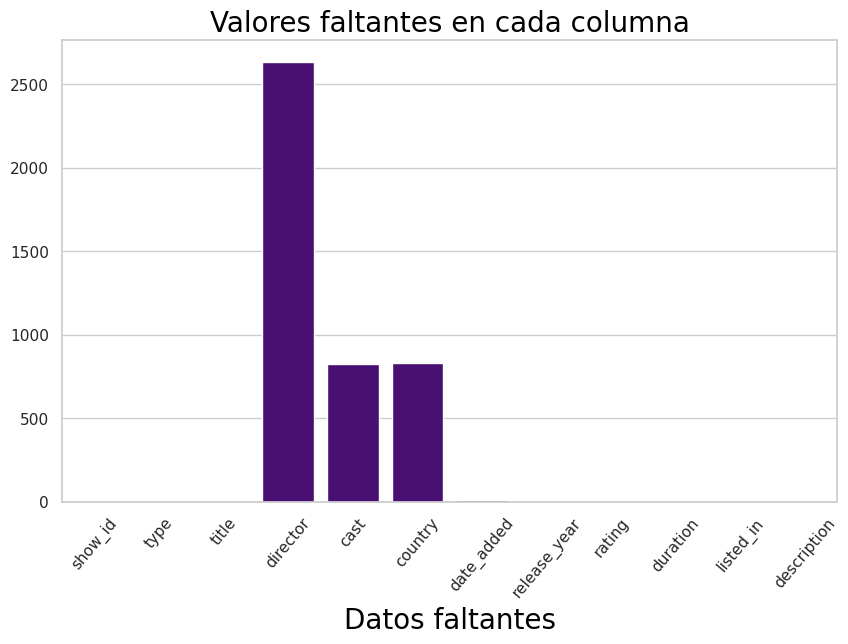

In [73]:
missing_values = df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, color= 'indigo')
plt.xticks(rotation=50)
plt.title('Valores faltantes en cada columna', size=20, color='black')
plt.xlabel('Datos faltantes', size=20, color='black')
plt.show()

#En conclusion, lo que mas hace falta son los valores de la columna director y cast, que son los que mas nos interesan para hacer un analisis mas profundo de los datos.

Analisis Exploratorio

Distribucion de los contenidos en una grafica

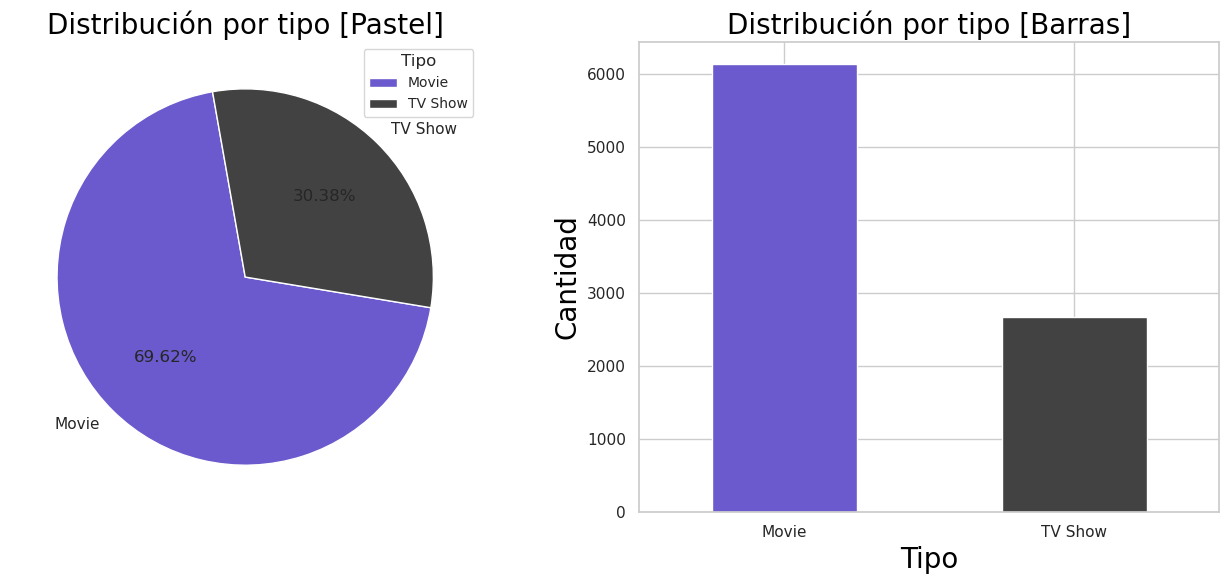

In [77]:
plt.figure(figsize=(13, 6))


plt.subplot(1, 2, 1 )
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.2f%%', startangle=100, colors=['slateblue', '#424242'])
plt.legend(title='Tipo', loc='upper right', fontsize=10)
plt.title('Distribución por tipo [Pastel]', size=20, color='black')


plt.subplot(1, 2, 2)
df['type'].value_counts().plot(kind='bar', color=['slateblue', '#424242'])
plt.xticks(rotation=0)
plt.title('Distribución por tipo [Barras]', size=20, color='black')
plt.xlabel('Tipo', size=20, color='black')
plt.ylabel('Cantidad', size=20, color='black')


plt.tight_layout()
plt.show()

Dividimos los paises en listas

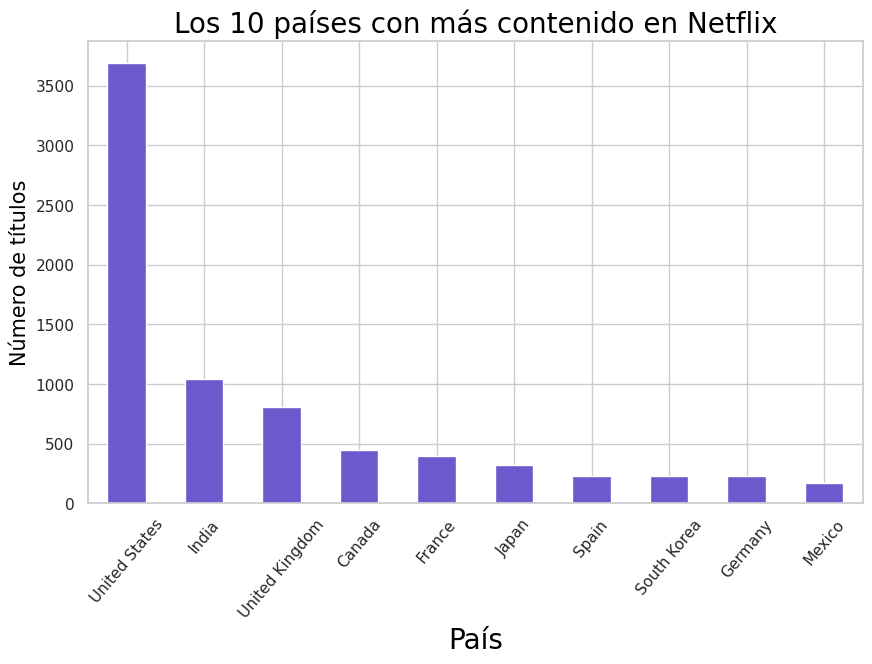

In [78]:
df_countries = df['country'].dropna().str.split(', ')
df_exploded = df_countries.explode()

top_countries = df_exploded.value_counts().head(10)

top_countries.plot(kind='bar', color='slateblue')
plt.title('Los 10 países con más contenido en Netflix' , color='black', size=20)
plt.xticks(rotation=50)
plt.xlabel('País', color='black', size=20)
plt.ylabel('Número de títulos', color='black', size=15)
plt.show()

Visualizamos que rating contiene mas titulos

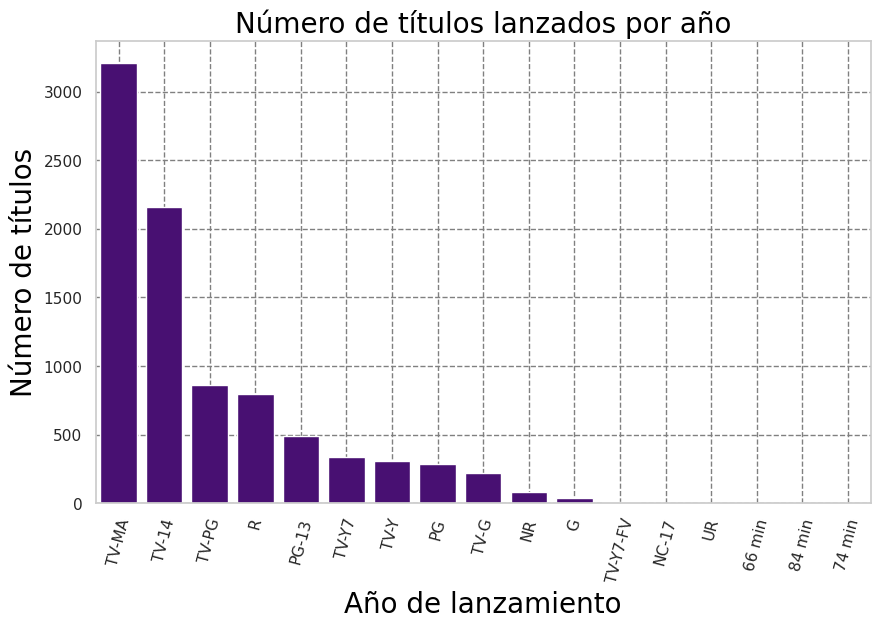

In [79]:
datos = df.groupby(['rating'])['title'].count().reset_index().sort_values('title',ascending=False)
y=datos['title']
x=datos['rating']

grafica= sns.barplot(datos, x=x, y=y, color='indigo')

plt.title('Número de títulos lanzados por año', color='black', size=20)
plt.xlabel('Año de lanzamiento', color='black', size=20)
plt.ylabel('Número de títulos', color='black', size=20)
plt.xticks(rotation=75)
plt.grid(linewidth=1, linestyle='--', color='gray')
plt.show()


Visualizamos la cantidad de Series/TV Shows por duracion(Temporada)

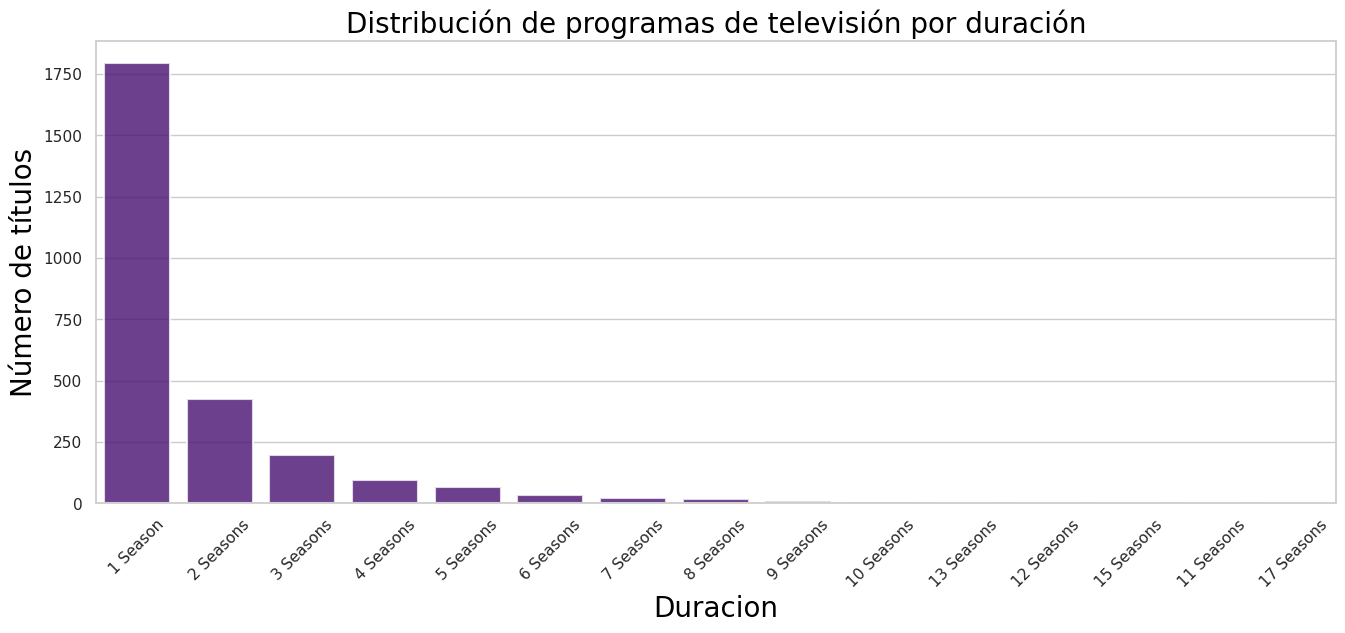

In [83]:
g = df[df['type'] == 'TV Show']
g = g.groupby('duration')['title'].count().reset_index().sort_values('title', ascending=False)
g = g.rename(columns={'title': 'TV Shows', 'duration': 'Seasons'})
plt.figure(figsize=(16, 6))
sns.barplot(
    data = g,
    x = 'Seasons',
    y = 'TV Shows',
    color = 'indigo',
    linewidth = 1.5,
    alpha = 0.8
)
plt.title('Distribución de programas de televisión por duración', size=20, color='black')
plt.xlabel('Duracion', size=20, color='black')
plt.ylabel('Número de títulos', size=20, color='black')
plt.xticks(rotation=45)
plt.show()


Viendo cuales son los directores con mas peliculas

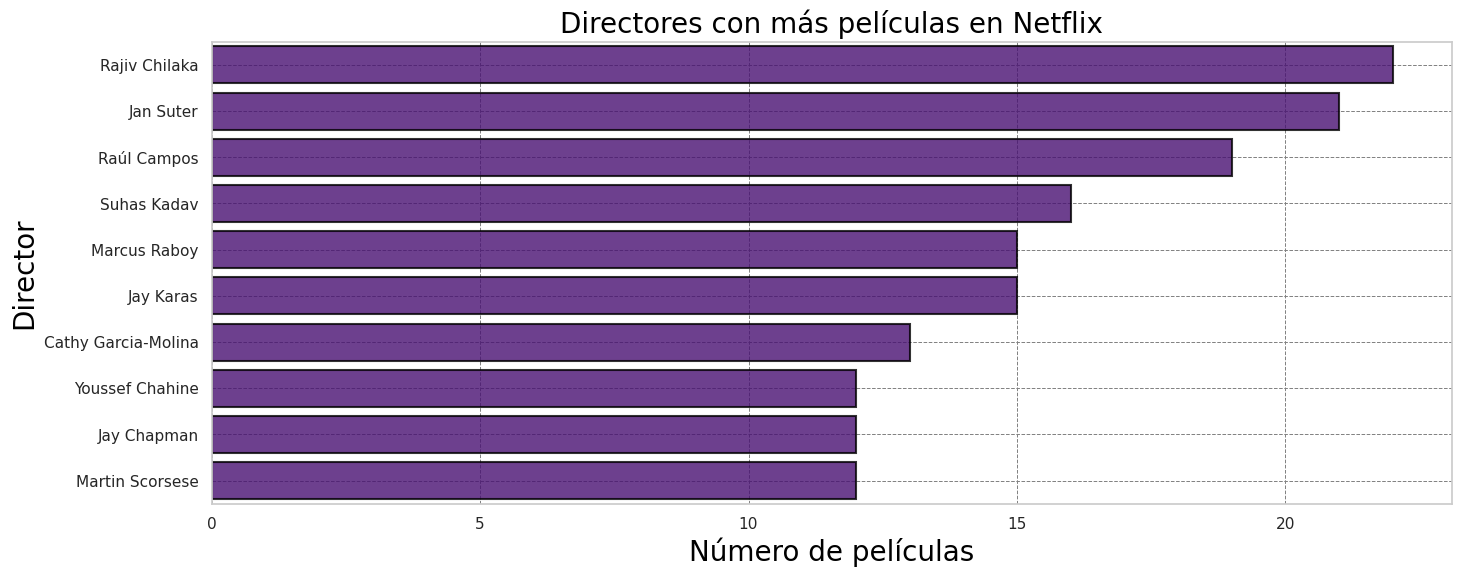

In [84]:
filtrado = df[df['type'] == 'Movie']
filtrado = filtrado['director'].str.split(', ', expand=True).stack()
filtrado = filtrado.to_frame()
filtrado.columns = ['director']
Directores = filtrado.groupby(['director']).size().reset_index(name='Total Content')
Directores = Directores[Directores.director != 'No Data']
Directores = Directores.sort_values(by='Total Content', ascending=False)
top10 = Directores.head(10)
top10 = top10.sort_values(by='Total Content', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top10,
    x='Total Content',
    y='director',
    color='indigo',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)
plt.title('Directores con más películas en Netflix', size=20, color='black')
plt.xlabel('Número de películas', size=20, color='black')
plt.ylabel('Director', size=20, color='black')
plt.grid(linestyle='--', linewidth=0.7, color='gray')
plt.show()


Obtener los datos ordenados por año

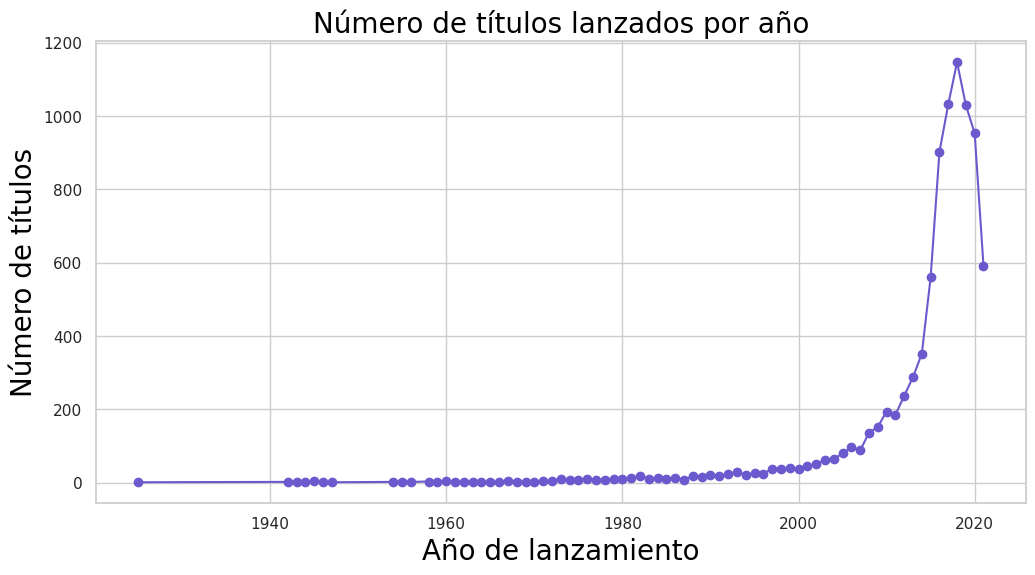

In [85]:
data = df['release_year' ].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, marker='o', linestyle= '-', color='slateblue')
plt.title('Número de títulos lanzados por año', color='black', size=20)
plt.xlabel('Año de lanzamiento', color='black', size=20)
plt.ylabel('Número de títulos', color='black', size=20 , rotation=90)
plt.grid(True)
plt.show()

Mejores actores y con mas Peliculas

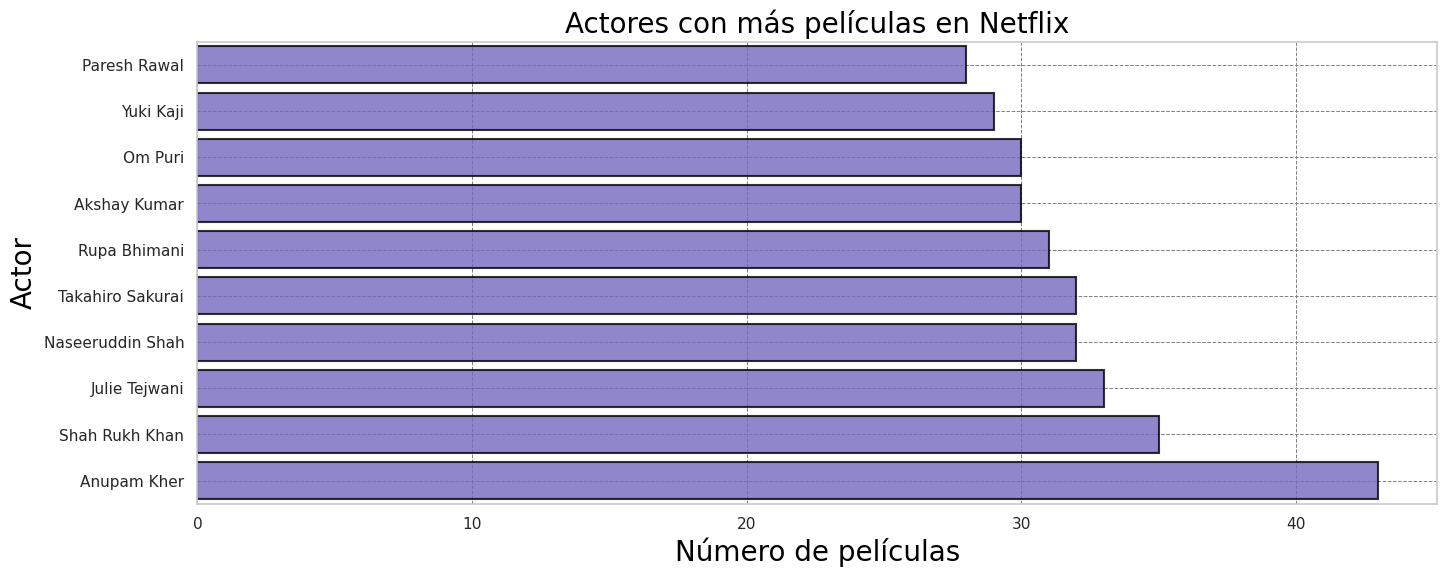

In [87]:
filter = df[df['type'] == 'Movie']
filter = df['cast'].str.split(', ', expand=True).stack()
filter = filter.to_frame()
filter.columns = ['Actors']
actors = filter.groupby(['Actors']).size().reset_index(name='Total Content')
actors = actors[actors.Actors != 'No Data']
actors = actors.sort_values(by='Total Content', ascending=False)
top10actors = actors.head(10)
top10actors = top10actors.sort_values(by='Total Content')
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top10actors,
    x='Total Content',
    y='Actors',
    color='slateblue',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)
plt.title('Actores con más películas en Netflix', size=20, color='black')
plt.xlabel('Número de películas', size=20, color='black')
plt.ylabel('Actor', size=20, color='black')
plt.grid(linestyle='--', linewidth=0.7, color='gray')
plt.show()
